(lln_clt)=
```{raw} jupyter
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# {index}`大数定律 <single: LLN>` 和 {index}`中心极限定理 <single: CLT>`

```{index} single: Law of Large Numbers
```

```{index} single: Central Limit Theorem
```

```{contents} 目录
:depth: 2
```

## 概述

本讲座阐述概率论和统计学中两个最重要的定理：大数定律（LLN）和中心极限定理（CLT）。

这些优美的定理是计量经济学和定量经济建模中许多最基本结果的基础。

本讲座基于展示大数定律和中心极限定理实际应用的模拟。

我们还将演示当大数定律和中心极限定理的基本假设不成立时，这些定理是如何失效的。

此外，我们还将探讨这些经典定理的几个有用扩展，例如：

* 用于随机变量平滑函数的 delta 方法，以及
* 多元情况。

其中一些扩展将以练习的形式呈现。

我们需要以下导入：

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
FONTPATH = "fonts/SourceHanSerifSC-SemiBold.otf"
mpl.font_manager.fontManager.addfont(FONTPATH)
plt.rcParams['font.family'] = ['Source Han Serif SC']

plt.rcParams["figure.figsize"] = (11, 5)  #设置默认图形大小
import random
import numpy as np
from scipy.stats import t, beta, lognorm, expon, gamma, uniform
from scipy.stats import gaussian_kde, poisson, binom, norm, chi2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from scipy.linalg import inv, sqrtm

## 关系

中心极限定理（CLT）完善了大数定律（LLN）。

大数定律给出了样本矩随样本量增加而收敛到总体矩的条件。

中心极限定理提供了关于样本矩以何种速率随样本量增加而收敛到总体矩的信息。

(lln_mr)=
## 大数定律

```{index} single: Law of Large Numbers
```

我们从大数定律开始，它告诉我们样本平均值何时会收敛到总体均值。

(lln_ksl)=
### 经典大数定律

经典大数定律涉及独立同分布（IID）随机变量。

这里是经典大数定律的最强版本，被称为*柯尔莫戈洛夫强大数定律*。

设 $X_1, \ldots, X_n$ 是独立同分布的标量随机变量，具有相同的分布 $F$。

当存在时，令 $\mu$ 表示该样本的共同均值：

$$
\mu := \mathbb E X = \int x F(dx)
$$

此外，令

$$
\bar X_n := \frac{1}{n} \sum_{i=1}^n X_i
$$

Kolmogorov强大数定律指出，如果$\mathbb E |X|$是有限的，那么

```{math}
:label: lln_as

\mathbb P \left\{ \bar X_n \to \mu \text{ as } n \to \infty \right\} = 1
```

这个表达式是什么意思？

让我们从模拟的角度来思考，暂时假设我们的计算机可以生成完美的随机样本（当然[实际上不能](https://en.wikipedia.org/wiki/Pseudorandom_number_generator)）。

我们也假设我们可以生成无限序列，这样就可以评估$\bar X_n \to \mu$这个陈述。

在这种情况下，{eq}`lln_as`应该被理解为：计算机生成一个不满足$\bar X_n \to \mu$的序列的概率为零。

### 证明

```{index} single: Law of Large Numbers; Proof
```

Kolmogorov强大数定律的证明并不简单 -- 参见{cite}`Dudley2002`的定理8.3.5。

另一方面，我们可以很容易地证明大数定律的一个较弱版本，而且

仍然可以理解大部分直观含义。

我们要证明的版本如下：如果 $X_1, \ldots, X_n$ 是独立同分布的，且 $\mathbb E X_i^2 < \infty$，
那么对于任意 $\epsilon > 0$，我们有

```{math}
:label: lln_ip

\mathbb P \left\{ | \bar X_n - \mu | \geq \epsilon \right\} \to 0
\quad \text{as} \quad
n \to \infty
```

(这个版本较弱，因为我们只声称[依概率收敛](https://en.wikipedia.org/wiki/Convergence_of_random_variables#Convergence_in_probability)而不是[几乎必然收敛](https://en.wikipedia.org/wiki/Convergence_of_random_variables#Almost_sure_convergence)，并且假设二阶矩有限)

要证明这一点，固定 $\epsilon > 0$，并令 $\sigma^2$ 为每个 $X_i$ 的方差。

回忆[切比雪夫不等式](https://en.wikipedia.org/wiki/Chebyshev%27s_inequality)，它告诉我们

```{math}
:label: lln_cheb

\mathbb P \left\{ | \bar X_n - \mu | \geq \epsilon \right\}
\leq \frac{\mathbb E [ (\bar X_n - \mu)^2]}{\epsilon^2}
```

现在观察到

$$
\begin{aligned}
    \mathbb E [ (\bar X_n - \mu)^2 ]
    & = \mathbb E \left\{ \left[
    \frac{1}{n} \sum_{i=1}^n (X_i - \mu)
    \right]^2 \right\}
    \\
    & = \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n \mathbb E (X_i - \mu)(X_j - \mu) \nonumber
    \\
    & = \frac{1}{n^2} \sum_{i=1}^n \mathbb E (X_i - \mu)^2 \nonumber
    \\
    & = \frac{\sigma^2}{n} \nonumber
\end{aligned}
$$

这里关键的步骤是第三个等式，它是由独立性得出的。

独立性意味着如果 $i \not= j$，那么协方差项 $\mathbb E (X_i - \mu)(X_j - \mu)$ 就会消失。

因此，$n^2 - n$ 项消失了，使我们得到一个随 $n$ 趋近于零的最终表达式。

将我们的最后结果与{eq}`lln_cheb`结合，我们得到估计

```{math}
:label: lln_cheb2

\mathbb P \left\{ | \bar X_n - \mu | \geq \epsilon \right\}
\leq \frac{\sigma^2}{n \epsilon^2}
```

{eq}`lln_ip`中的声明现在就很清楚了。

当然，如果序列 $X_1, \ldots, X_n$ 是相关的，那么交叉项
$\mathbb E (X_i - \mu)(X_j - \mu)$ 不一定为零。

虽然这并不意味着相同的论证方法是不可能的，但这确实意味着
如果我们想要得到类似的结果，那么"大多数"这些项的协方差应该"接近零"。

在一个长序列中，如果 $\mathbb E (X_i - \mu)(X_j - \mu)$ 在 $i$ 和 $j$ 的差值
变大时趋近于零，那么这种情况就会成立。

换句话说，如果序列 $X_1, \ldots, X_n$ 具有某种"渐近独立性"，即当变量在序列中的距离增大时相关性降为零，大数定律仍然可以成立。

这个概念在时间序列分析中非常重要，我们很快就会再次遇到它。

### 示例说明

```{index} single: Law of Large Numbers; Illustration
```

现在让我们用模拟来说明经典的独立同分布大数定律。

特别地，我们的目标是生成一些独立同分布随机变量序列，并绘制 $\bar X_n$ 随 $n$ 增加的演变过程。

下面的图正是展示了这一点（和往常一样，您可以点击图片放大查看）。

图中展示了来自三个不同分布的独立同分布观测值，并在每种情况下绘制了 $\bar X_n$ 与 $n$ 的关系。

点表示基础观测值 $X_i$，其中 $i = 1, \ldots, 100$。

在这三种情况下，$\bar X_n$ 都如预期般收敛到 $\mu$

<>:38: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_7241/2841083534.py:38: SyntaxWarning: invalid escape sequence '\s'
  axlabel = '$\\bar{X}_n$ for $X_i \sim$' + name


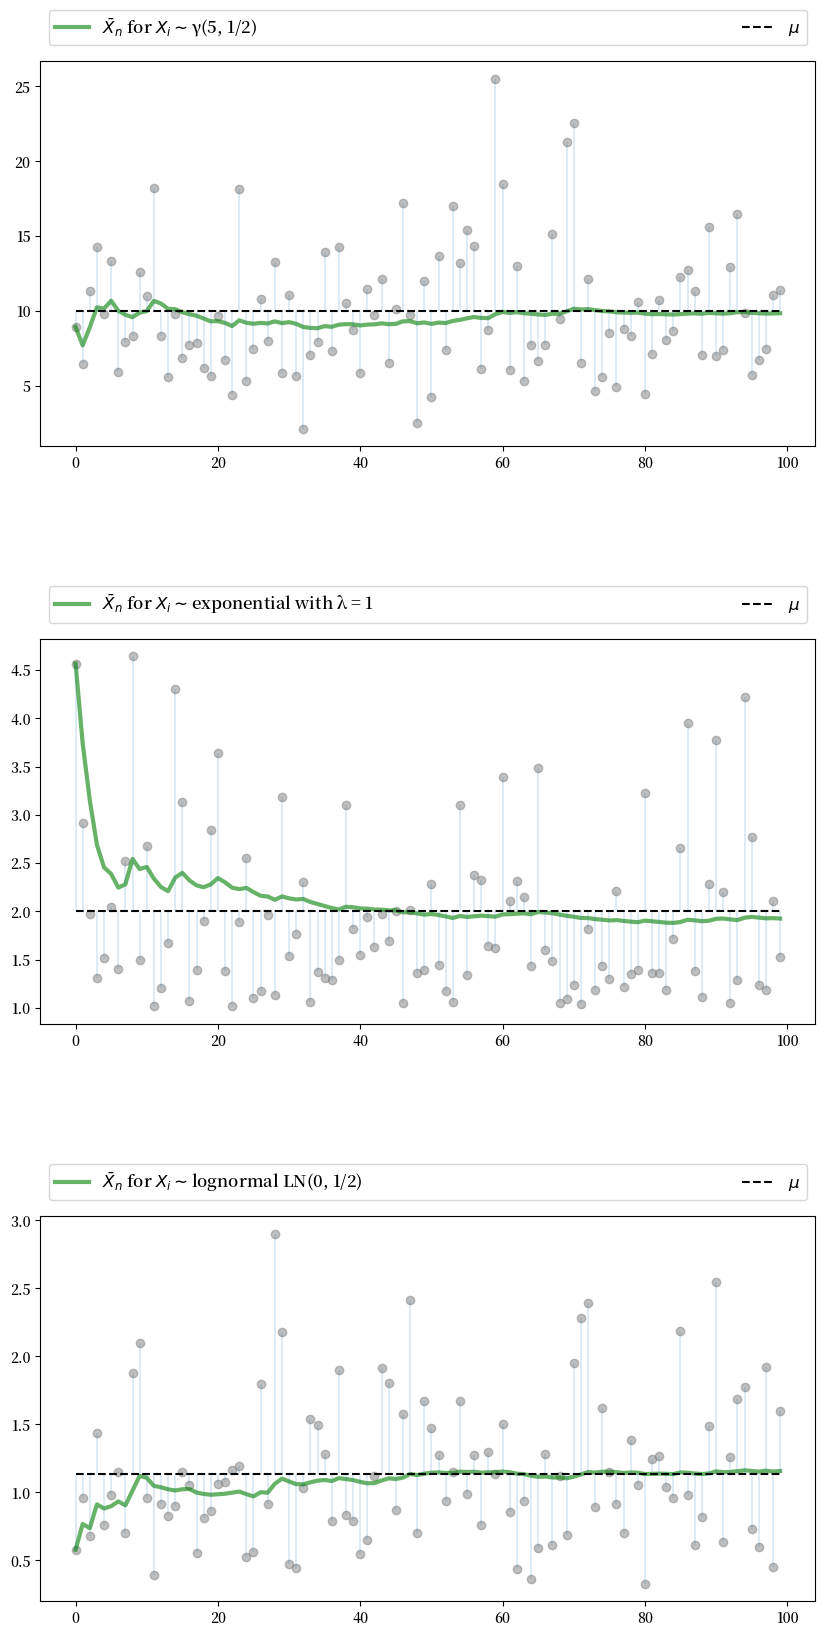

In [2]:
n = 100

# 任意分布集合
distributions = {"student's t with 10 degrees of freedom": t(10),
                 "β(2, 2)": beta(2, 2),
                 "lognormal LN(0, 1/2)": lognorm(0.5),
                 "γ(5, 1/2)": gamma(5, scale=2),
                 "poisson(4)": poisson(4),
                 "exponential with λ = 1": expon(1)}

# 创建图形和坐标轴
num_plots = 3
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 20))

# 设置一些绘图参数以改善布局
bbox = (0., 1.02, 1., .102)
legend_args = {'ncol': 2,
               'bbox_to_anchor': bbox,
               'loc': 3,
               'mode': 'expand'}
plt.subplots_adjust(hspace=0.5)

for ax in axes:
    # 随机选择一个分布
    name = random.choice(list(distributions.keys()))
    distribution = distributions.pop(name)

    # 从分布中生成n个样本
    data = distribution.rvs(n)

    # 计算每个n处的样本均值
    sample_mean = np.empty(n)
    for i in range(n):
        sample_mean[i] = np.mean(data[:i+1])

    # 绘图
    ax.plot(list(range(n)), data, 'o', color='grey', alpha=0.5)
    axlabel = '$\\bar{X}_n$ for $X_i \sim$' + name
    ax.plot(list(range(n)), sample_mean, 'g-', lw=3, alpha=0.6, label=axlabel)
    m = distribution.mean()
    ax.plot(list(range(n)), [m] * n, 'k--', lw=1.5, label=r'$\mu$')
    ax.vlines(list(range(n)), m, data, lw=0.2)
    ax.legend(**legend_args, fontsize=12)

plt.show()

这三个分布是从存储在字典 `distributions` 中的选项中随机选择的。

## 中心极限定理

```{index} single: Central Limit Theorem
```

接下来，我们来看中心极限定理，它告诉我们样本平均值与总体均值之间偏差的分布情况。

### 定理陈述

中心极限定理是数学中最令人惊叹的结果之一。

在经典的独立同分布（IID）设定下，它告诉我们以下内容：

(statement_clt)=
如果序列 $X_1, \ldots, X_n$ 是独立同分布的，具有相同的均值
$\mu$ 和相同的方差 $\sigma^2 \in (0, \infty)$，那么

```{math}
:label: lln_clt

\sqrt{n} ( \bar X_n - \mu ) \stackrel { d } {\to} N(0, \sigma^2)
\quad \text{当} \quad
n \to \infty
```

这里 $\stackrel { d } {\to} N(0, \sigma^2)$ 表示[分布收敛](https://en.wikipedia.org/wiki/Convergence_of_random_variables#Convergence_in_distribution)到一个中心化的（即均值为零）正态分布，其标准差为 $\sigma$。

### 直观理解

```{index} single: 中心极限定理; 直观理解
```

中心极限定理最引人注目的含义是，对于**任何**具有有限二阶矩的分布，简单地将独立样本相加**总是**会导致高斯曲线。

通过使用特征函数可以得到中心极限定理相对简单的证明（参见{cite}`Dudley2002`的定理9.5.6）。

这个证明很优雅但几乎有点令人失望，因为它提供的直观理解非常有限。

事实上，我们所知道的所有中心极限定理的证明在这方面都是类似的。

为什么将独立样本相加会产生钟形分布？

部分答案可以通过研究独立伯努利随机变量的加法来获得。

具体来说，令$X_i$为二元随机变量，其中$\mathbb P\{X_i = 0\} = \mathbb P\{X_i = 1 \} = 0.5$，且$X_1, \ldots, X_n$相互独立。

把 $X_i = 1$ 看作一次"成功"，那么 $Y_n = \sum_{i=1}^n X_i$ 就是在 $n$ 次试验中成功的次数。

下图展示了当 $n = 1, 2, 4, 8$ 时，$Y_n$ 的概率质量函数

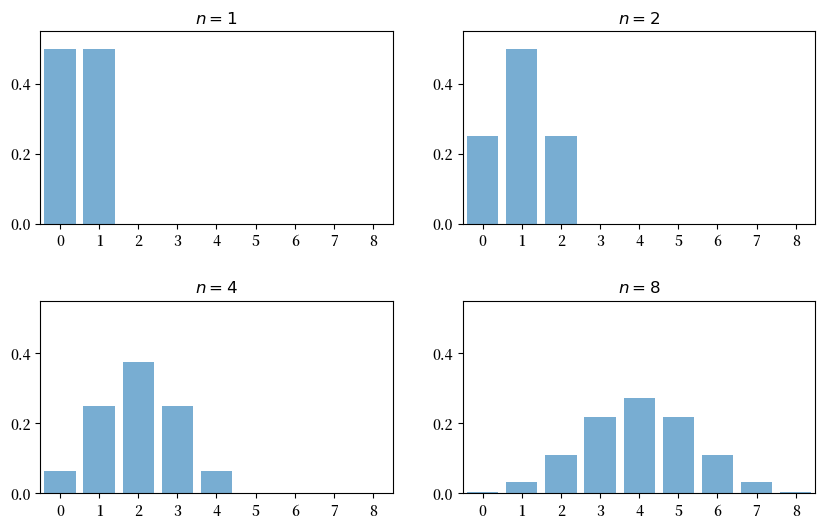

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
plt.subplots_adjust(hspace=0.4)
axes = axes.flatten()
ns = [1, 2, 4, 8]
dom = list(range(9))

for ax, n in zip(axes, ns):
    b = binom(n, 0.5)
    ax.bar(dom, b.pmf(dom), alpha=0.6, align='center')
    ax.set(xlim=(-0.5, 8.5), ylim=(0, 0.55),
           xticks=list(range(9)), yticks=(0, 0.2, 0.4),
           title=f'$n = {n}$')

plt.show()

当 $n = 1$ 时，分布是平坦的 --- 一次成功或零次成功具有相同的概率。

当 $n = 2$ 时，我们可能得到0、1或2次成功。

注意在中点 $k=1$ 处概率质量的峰值。

这是因为获得1次成功（"先失败后成功"或"先成功后失败"）的方式比获得零次或两次成功的方式更多。

而且，两次试验是独立的，所以"先失败后成功"和"先成功后失败"的结果与"连续失败"和"连续成功"的结果一样可能。

（如果存在正相关，那么"先成功后失败"的可能性就会比"连续成功"小）

在这里，我们已经看到了中心极限定理的本质：在独立性条件下的加法导致概率质量在中间堆积，在尾部变薄。

对于 $n = 4$ 和 $n = 8$，我们再次在"中间"值（最小可能值和最大可能值之间的中点）处得到一个峰值。

这个直觉是一样的 --- 只是这些中间结果有更多种可能的方式。

如果我们继续下去，钟形曲线会变得更加明显。

我们正在见证[二项分布对正态分布的近似](https://en.wikipedia.org/wiki/De_Moivre%E2%80%93Laplace_theorem)。

### 模拟1

由于中心极限定理看起来几乎是神奇的，运行模拟来验证其含义是建立直觉的一个好方法。

为此，我们现在进行以下模拟

1. 为底层观测值$X_i$选择一个任意分布$F$。
1. 生成$Y_n := \sqrt{n} ( \bar X_n - \mu )$的独立抽样。
1. 使用这些抽样来计算其分布的某些度量 --- 比如直方图。
1. 将后者与$N(0, \sigma^2)$进行比较。

下面是一些代码，专门用于指数分布$F(x) = 1 - e^{- \lambda x}$的这种模拟。

(请尝试其他的$F$选择，但请记住，为了符合中心极限定理的条件，分布必须具有有限的二阶矩。)

(sim_one)=

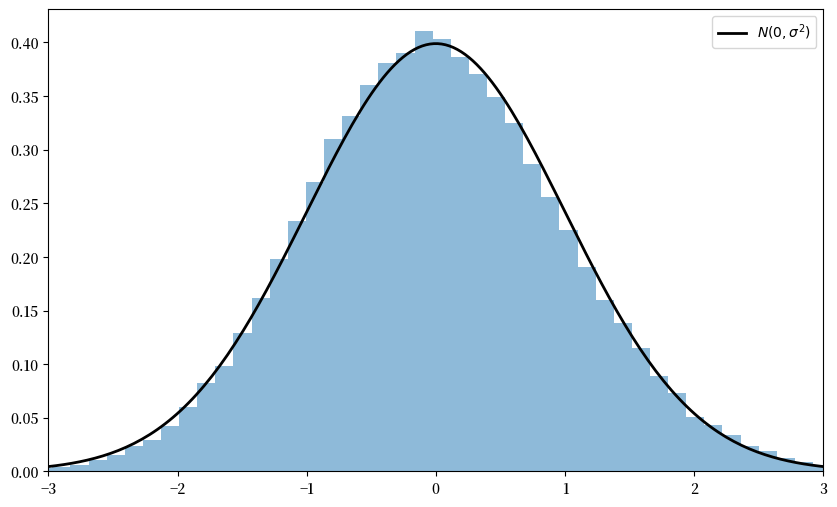

In [4]:
# 设置参数
n = 250                  # n的选择
k = 100000              # Y_n的抽样次数
distribution = expon(2)  # 指数分布，λ = 1/2
μ, s = distribution.mean(), distribution.std()

# 抽取基础随机变量。每行包含X_1,...,X_n的一次抽样
data = distribution.rvs((k, n))
# 计算每行的平均值，产生k个\bar X_n的抽样
sample_means = data.mean(axis=1)
# 生成Y_n的观测值
Y = np.sqrt(n) * (sample_means - μ)

# 绘图
fig, ax = plt.subplots(figsize=(10, 6))
xmin, xmax = -3 * s, 3 * s
ax.set_xlim(xmin, xmax)
ax.hist(Y, bins=60, alpha=0.5, density=True)
xgrid = np.linspace(xmin, xmax, 200)
ax.plot(xgrid, norm.pdf(xgrid, scale=s), 'k-', lw=2, label=r'$N(0, \sigma^2)$')
ax.legend()

plt.show()

注意这里没有使用for循环 --- 每个操作都是向量化的，这意味着主要计算都转移到了高度优化的C代码中。

与正态密度的拟合已经很紧密，通过增加`n`可以进一步改善。

你也可以尝试其他$F$的规格。

### 模拟2

我们的下一个模拟在某种程度上类似于第一个，不同之处在于我们旨在追踪$Y_n := \sqrt{n} ( \bar X_n - \mu )$的分布随着$n$的增加而变化。

在模拟中，我们将处理均值$\mu = 0$的随机变量。

因此，当$n=1$时，我们有$Y_1 = X_1$，所以第一个分布就是底层随机变量的分布。

对于$n=2$，$Y_2$的分布是$(X_1 + X_2) / \sqrt{2}$的分布，以此类推。

我们预期的是，无论底层随机变量的分布如何，$Y_n$的分布都会平滑成钟形曲线。

下图显示了$X_i \sim f$的这个过程，其中$f$是

指定为三个不同贝塔分布的凸组合。

（取凸组合是产生 $f$ 不规则形状的一种简单方法。）

在图中，最近的密度是 $Y_1$ 的密度，而最远的是 $Y_5$ 的密度。

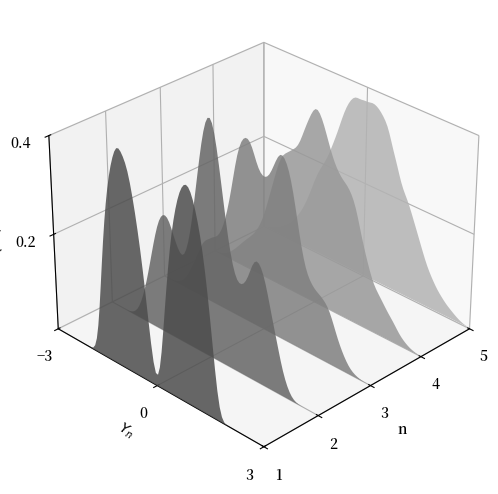

In [5]:
beta_dist = beta(2, 2)

def gen_x_draws(k):
    """
    返回一个包含从底层随机变量 X 的分布中独立抽取 k 次的扁平数组。
    这个分布本身是三个贝塔分布的凸组合。
    """
    bdraws = beta_dist.rvs((3, k))
    # 转换行，使每行代表不同的分布
    bdraws[0, :] -= 0.5
    bdraws[1, :] += 0.6
    bdraws[2, :] -= 1.1
    # 设置 X[i] = bdraws[j, i]，其中 j 是从 {0, 1, 2} 中随机抽取的
    js = np.random.randint(0, 2, size=k)
    X = bdraws[js, np.arange(k)]
    # 重新缩放，使随机变量均值为零
    m, sigma = X.mean(), X.std()
    return (X - m) / sigma

nmax = 5
reps = 100000
ns = list(range(1, nmax + 1))

# 构建矩阵 Z，使每列都是 X 的 reps 个独立抽样
Z = np.empty((reps, nmax))
for i in range(nmax):
    Z[:, i] = gen_x_draws(reps)
# 对列进行累积求和
S = Z.cumsum(axis=1)
# 将第 j 列乘以 sqrt j
Y = (1 / np.sqrt(ns)) * S

# 绘图
ax = plt.figure(figsize = (10, 6)).add_subplot(projection='3d')

a, b = -3, 3
gs = 100
xs = np.linspace(a, b, gs)

# 构建顶点
greys = np.linspace(0.3, 0.7, nmax)
verts = []
for n in ns:
    density = gaussian_kde(Y[:, n-1])
    ys = density(xs)
    verts.append(list(zip(xs, ys)))

poly = PolyCollection(verts, facecolors=[str(g) for g in greys])
poly.set_alpha(0.85)
ax.add_collection3d(poly, zs=ns, zdir='x')

ax.set(xlim3d=(1, nmax), xticks=(ns), ylabel='$Y_n$', zlabel='$p(y_n)$',
       xlabel=("n"), yticks=((-3, 0, 3)), ylim3d=(a, b),
       zlim3d=(0, 0.4), zticks=((0.2, 0.4)))
ax.invert_xaxis()
# 在 z 轴上旋转 30 度，在 x 轴上旋转 45 度
ax.view_init(30, 45)
plt.show()

正如预期的那样，随着$n$的增加，分布逐渐平滑成钟形曲线。

如果您想了解更多，我们建议您自行探索其内容。

如果您从普通的IPython shell运行该文件，图形应该会在一个窗口中弹出，您可以用鼠标旋转它，从不同角度查看密度序列。

(multivariate_clt)=
### 多元情况

```{index} single: Law of Large Numbers; Multivariate Case
```

```{index} single: Central Limit Theorem; Multivariate Case
```

大数定律和中心极限定理在多维环境中同样适用。

为了阐述这些结果，让我们回顾一些关于随机向量的基本事实。

随机向量$\mathbf X$就是一个由$k$个随机变量组成的序列$(X_1, \ldots, X_k)$。

$\mathbf X$的每个实现都是$\mathbb R^k$中的一个元素。

如果对于任意 $n$ 个向量 $\mathbf x_1, \ldots, \mathbf x_n$ （在 $\mathbb R^k$ 中），随机向量集合 $\mathbf X_1, \ldots, \mathbf X_n$ 满足：

$$
\mathbb P\{\mathbf X_1 \leq \mathbf x_1,\ldots, \mathbf X_n \leq \mathbf x_n \}
= \mathbb P\{\mathbf X_1 \leq \mathbf x_1 \}
\times \cdots \times \mathbb P\{ \mathbf X_n \leq \mathbf x_n \}
$$

则称这个随机向量集合是独立的。

（向量不等式 $\mathbf X \leq \mathbf x$ 表示对于 $j = 1,\ldots,k$，都有 $X_j \leq x_j$）

令 $\mu_j := \mathbb E [X_j]$，其中 $j =1,\ldots,k$。

向量 $\mathbf X$ 的期望 $\mathbb E [\mathbf X]$ 定义为各分量期望组成的向量：

$$
\mathbb E [\mathbf X] :=
\left(
\begin{array}{c}
    \mathbb E [X_1] \\
    \mathbb E [X_2] \\
    \vdots \\
    \mathbb E [X_k]
\end{array}
\right) =
\left(
\begin{array}{c}
    \mu_1 \\
    \mu_2\\
    \vdots \\
    \mu_k
\end{array}
\right) =: \boldsymbol \mu
$$

随机向量 $\mathbf X$ 的*方差-协方差矩阵*定义为

$$

\mathop{\mathrm{Var}}[\mathbf X]
:= \mathbb E
[ (\mathbf X - \boldsymbol \mu) (\mathbf X - \boldsymbol \mu)']
$$

展开后得到

$$
\mathop{\mathrm{Var}}[\mathbf X] =
\left(
\begin{array}{ccc}
    \mathbb E [(X_1 - \mu_1)(X_1 - \mu_1)]
        & \cdots & \mathbb E [(X_1 - \mu_1)(X_k - \mu_k)] \\
    \mathbb E [(X_2 - \mu_2)(X_1 - \mu_1)]
        & \cdots & \mathbb E [(X_2 - \mu_2)(X_k - \mu_k)] \\
    \vdots & \vdots & \vdots \\
    \mathbb E [(X_k - \mu_k)(X_1 - \mu_1)]
        & \cdots & \mathbb E [(X_k - \mu_k)(X_k - \mu_k)] \\
\end{array}
\right)
$$

第$j,k$项是$X_j$和$X_k$之间的标量协方差。

有了这个表示法，我们可以继续讨论多元大数定律和中心极限定理。

设$\mathbf X_1, \ldots, \mathbf X_n$是一个独立同分布的随机向量序列，每个向量都取值于$\mathbb R^k$中。

令$\boldsymbol \mu$为向量$\mathbb E [\mathbf X_i]$，令$\Sigma$为$\mathbf X_i$的方差-协方差矩阵。

按照通常的方式解释向量加法和标量乘法（即逐点运算），令

$$
\bar{\mathbf X}_n := \frac{1}{n} \sum_{i=1}^n \mathbf X_i
$$

在这种情况下，大数定律告诉我们

```{math}
:label: lln_asmv

\mathbb P \left\{ \bar{\mathbf X}_n \to \boldsymbol \mu \text{ as } n \to \infty \right\} = 1
```

这里 $\bar{\mathbf X}_n \to \boldsymbol \mu$ 表示 $\| \bar{\mathbf X}_n - \boldsymbol \mu \| \to 0$，其中 $\| \cdot \|$ 是标准欧几里得范数。

中心极限定理告诉我们，如果 $\Sigma$ 是有限的，则

```{math}
:label: lln_cltmv

\sqrt{n} ( \bar{\mathbf X}_n - \boldsymbol \mu ) \stackrel { d } {\to} N(\mathbf 0, \Sigma)
\quad \text{as} \quad
n \to \infty
```

## 练习


```{exercise-start}
:label: lln_ex1
```

中心极限定理的一个非常有用的推论如下。

假设满足{ref}`上述陈述的<statement_clt>`中心极限定理的条件。

如果 $g \colon \mathbb R \to \mathbb R$ 在 $\mu$ 处可微且 $g'(\mu) \not= 0$，那么

```{math}
:label: lln_dm

\sqrt{n} \{ g(\bar X_n) - g(\mu) \}
\stackrel { d } {\to} N(0, g'(\mu)^2 \sigma^2)
\quad \text{as} \quad
n \to \infty
```

这个定理在统计学中经常用于获得估计量的渐近分布——其中许多可以表示为样本均值的函数。

(这类结果通常被称为使用"delta方法"。)

证明基于$g$在点$\mu$处的泰勒展开。

假设每个$X_i$的分布$F$在$[0, \pi / 2]$上均匀分布，且$g(x) = \sin(x)$。

推导$\sqrt{n} \{ g(\bar X_n) - g(\mu) \}$的渐近分布，并按照{ref}`上述<sim_one>`程序的方式说明其收敛性。

当你将$[0, \pi / 2]$替换为$[0, \pi]$时会发生什么？

问题的根源是什么？

```{exercise-end}
```

```{solution-start} lln_ex1
:class: dropdown
```

这是一个解决方案

<>:27: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_7241/1635721019.py:27: SyntaxWarning: invalid escape sequence '\m'
  lb = "$N(0, g'(\mu)^2  \sigma^2)$"


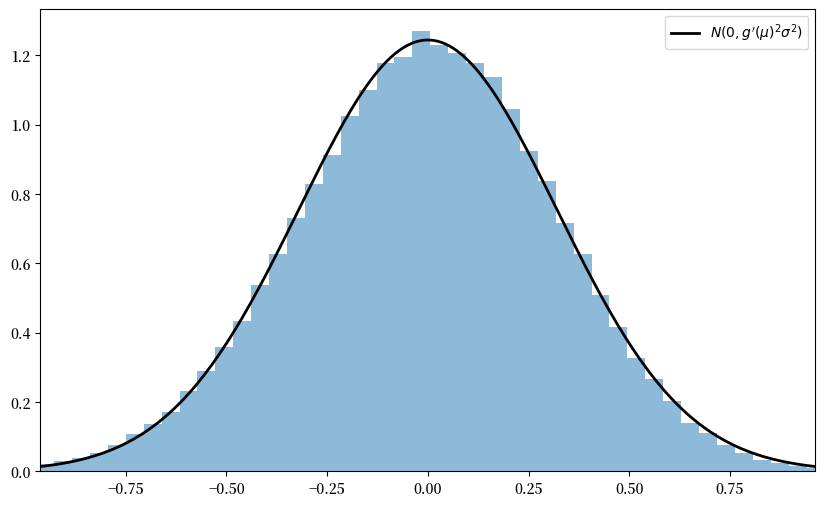

In [6]:
"""
演示delta方法，这是中心极限定理的一个推论。
"""

# 设置参数
n = 250
replications = 100000
distribution = uniform(loc=0, scale=(np.pi / 2))
μ, s = distribution.mean(), distribution.std()

g = np.sin
g_prime = np.cos

# 生成sqrt{n} (g(X_n) - g(μ))的观测值
data = distribution.rvs((replications, n))
sample_means = data.mean(axis=1)  # 计算每行的平均值
error_obs = np.sqrt(n) * (g(sample_means) - g(μ))

# 绘图
asymptotic_sd = g_prime(μ) * s
fig, ax = plt.subplots(figsize=(10, 6))
xmin = -3 * g_prime(μ) * s
xmax = -xmin
ax.set_xlim(xmin, xmax)
ax.hist(error_obs, bins=60, alpha=0.5, density=True)
xgrid = np.linspace(xmin, xmax, 200)
lb = "$N(0, g'(\mu)^2  \sigma^2)$"
ax.plot(xgrid, norm.pdf(xgrid, scale=asymptotic_sd), 'k-', lw=2, label=lb)
ax.legend()
plt.show()

当你将$[0, \pi / 2]$替换为$[0, \pi]$时会发生什么？

在这种情况下，该分布的均值$\mu$是$\pi/2$，并且由于$g' = \cos$，我们有$g'(\mu) = 0$。

因此，delta定理的条件不满足。

```{solution-end}
```


```{exercise-start}
:label: lln_ex2
```

这是一个在开发统计检验时经常使用的结果，它与多元中心极限定理有关。

如果你学习计量经济学理论，你会反复看到这个结果的应用。

假设处于{ref}`上述讨论的<multivariate_clt>`多元中心极限定理的设定中，即：

1. $\mathbf X_1, \ldots, \mathbf X_n$是一个IID随机向量序列，每个向量取值于$\mathbb R^k$。
1. $\boldsymbol \mu := \mathbb E [\mathbf X_i]$，且$\Sigma$是$\mathbf X_i$的方差-协方差矩阵。
1. 以下收敛成立：

```{math}
:label: lln_cltmv2

\sqrt{n} ( \bar{\mathbf X}_n - \boldsymbol \mu ) \stackrel { d } {\to} N(\mathbf 0, \Sigma)
```

在统计环境中，人们通常希望右侧是**标准**正态分布，这样可以轻松计算置信区间。

这种标准化可以基于以下三个观察结果来实现。

首先，如果$\mathbf X$是$\mathbb R^k$中的随机向量，且$\mathbf A$是常数且为$k \times k$矩阵，那么

$$
\mathop{\mathrm{Var}}[\mathbf A \mathbf X]
= \mathbf A \mathop{\mathrm{Var}}[\mathbf X] \mathbf A'
$$

其次，根据[连续映射定理](https://en.wikipedia.org/wiki/Continuous_mapping_theorem)，如果$\mathbf Z_n \stackrel{d}{\to} \mathbf Z$在$\mathbb R^k$中成立，且$\mathbf A$是常数且为$k \times k$矩阵，那么

$$
\mathbf A \mathbf Z_n
\stackrel{d}{\to} \mathbf A \mathbf Z
$$

第三，如果$\mathbf S$是一个$k \times k$对称正定矩阵，那么存在一个对称正定矩阵$\mathbf Q$，称为$\mathbf S$的[平方根](https://en.wikipedia.org/wiki/Square_root_of_a_matrix)的逆，使得

$$

\mathbf Q \mathbf S\mathbf Q' = \mathbf I
$$

这里 $\mathbf I$ 是 $k \times k$ 单位矩阵。

把这些内容放在一起，你的第一个练习是证明如果 $\mathbf Q$ 是 $\mathbf \Sigma$ 的逆平方根，那么

$$
\mathbf Z_n := \sqrt{n} \mathbf Q ( \bar{\mathbf X}_n - \boldsymbol \mu )
\stackrel{d}{\to}
\mathbf Z \sim N(\mathbf 0, \mathbf I)
$$

再次应用连续映射定理告诉我们

$$
\| \mathbf Z_n \|^2
\stackrel{d}{\to}
\| \mathbf Z \|^2
$$

根据 $\mathbf Z$ 的分布，我们得出结论

```{math}
:label: lln_ctc

n \| \mathbf Q ( \bar{\mathbf X}_n - \boldsymbol \mu ) \|^2
\stackrel{d}{\to}
\chi^2(k)
```

这里 $\chi^2(k)$ 是具有 $k$ 个自由度的卡方分布。

（回想一下，$k$ 是底层随机向量 $\mathbf X_i$ 的维度。）

你的第二个练习是通过模拟来说明 {eq}`lln_ctc` 中的收敛性。

在此过程中，令

$$
\mathbf X_i :=
\left(

\begin{array}{c}
    W_i \\
    U_i + W_i
\end{array}
\right)
$$

其中

* 每个 $W_i$ 是从区间 $[-1, 1]$ 上的均匀分布中独立同分布抽取的。
* 每个 $U_i$ 是从区间 $[-2, 2]$ 上的均匀分布中独立同分布抽取的。
* $U_i$ 和 $W_i$ 相互独立。

```{hint}
:class: dropdown

1. `scipy.linalg.sqrtm(A)` 用于计算 `A` 的平方根。你还需要求其逆。
1. 你应该能从前面的信息推导出 $\Sigma$。
```

```{exercise-end}
```

```{solution-start} lln_ex2
:class: dropdown
```

首先我们要验证以下说法：

$$
\sqrt{n} \mathbf Q ( \bar{\mathbf X}_n - \boldsymbol \mu )
\stackrel{d}{\to}
N(\mathbf 0, \mathbf I)
$$

根据习题中给出的事实，这是很直接的。

令

$$
\mathbf Y_n := \sqrt{n} ( \bar{\mathbf X}_n - \boldsymbol \mu )
\quad \text{和} \quad
\mathbf Y \sim N(\mathbf 0, \Sigma)
$$

根据多元中心极限定理和连续映射定理，我们有

$$
\mathbf Q \mathbf Y_n

\stackrel{d}{\to}
\mathbf Q \mathbf Y
$$

由于正态随机变量的线性组合也是正态的，向量$\mathbf Q \mathbf Y$也是正态的。

其均值显然为$\mathbf 0$，其方差-协方差矩阵为

$$
\mathrm{Var}[\mathbf Q \mathbf Y]
= \mathbf Q \mathrm{Var}[\mathbf Y] \mathbf Q'
= \mathbf Q \Sigma \mathbf Q'
= \mathbf I
$$

因此，
$\mathbf Q \mathbf Y_n \stackrel{d}{\to} \mathbf Q \mathbf Y \sim N(\mathbf 0, \mathbf I)$，
这就是我们要证明的。

现在我们来看模拟练习。

我们的解决方案如下

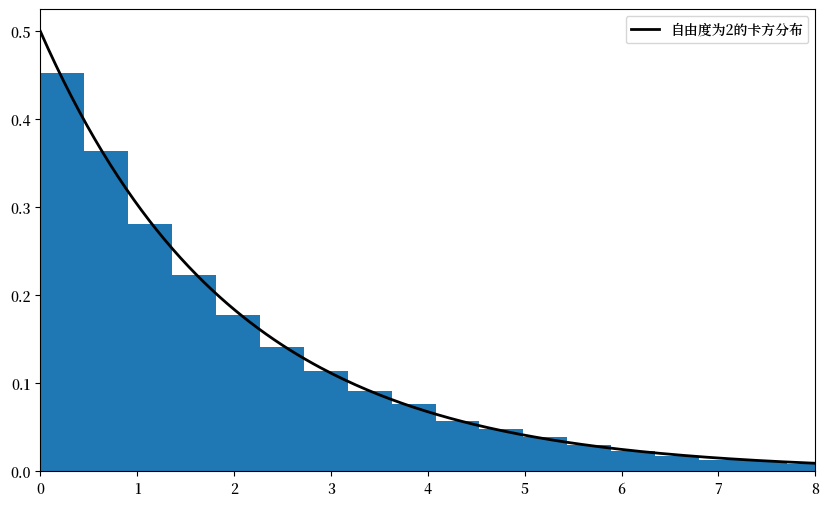

In [7]:
# 设置参数
n = 250
replications = 50000
dw = uniform(loc=-1, scale=2)  # 均匀分布(-1, 1)
du = uniform(loc=-2, scale=4)  # 均匀分布(-2, 2)
sw, su = dw.std(), du.std()
vw, vu = sw**2, su**2
Σ = ((vw, vw), (vw, vw + vu))
Σ = np.array(Σ)

# 计算 Σ^{-1/2}
Q = inv(sqrtm(Σ))

# 生成标准化样本均值的观测值
error_obs = np.empty((2, replications))
for i in range(replications):
    # 生成一组二元随机冲击
    X = np.empty((2, n))
    W = dw.rvs(n)
    U = du.rvs(n)
    # 构造随机向量的n个观测值
    X[0, :] = W
    X[1, :] = W + U
    # 构造Y_n的第i个观测值
    error_obs[:, i] = np.sqrt(n) * X.mean(axis=1)

# 乘以Q然后计算平方范数
temp = Q @ error_obs
chisq_obs = np.sum(temp**2, axis=0)

# 绘图
fig, ax = plt.subplots(figsize=(10, 6))
xmax = 8
ax.set_xlim(0, xmax)
xgrid = np.linspace(0, xmax, 200)
lb = "自由度为2的卡方分布"
ax.plot(xgrid, chi2.pdf(xgrid, 2), 'k-', lw=2, label=lb)
ax.legend()
ax.hist(chisq_obs, bins=50, density=True)
plt.show()

```{solution-end}
```